In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle  # For saving the model


advertising_data = pd.read_csv('advertising.csv')


print(advertising_data.head())


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9



Missing Values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Dataset Summary:
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


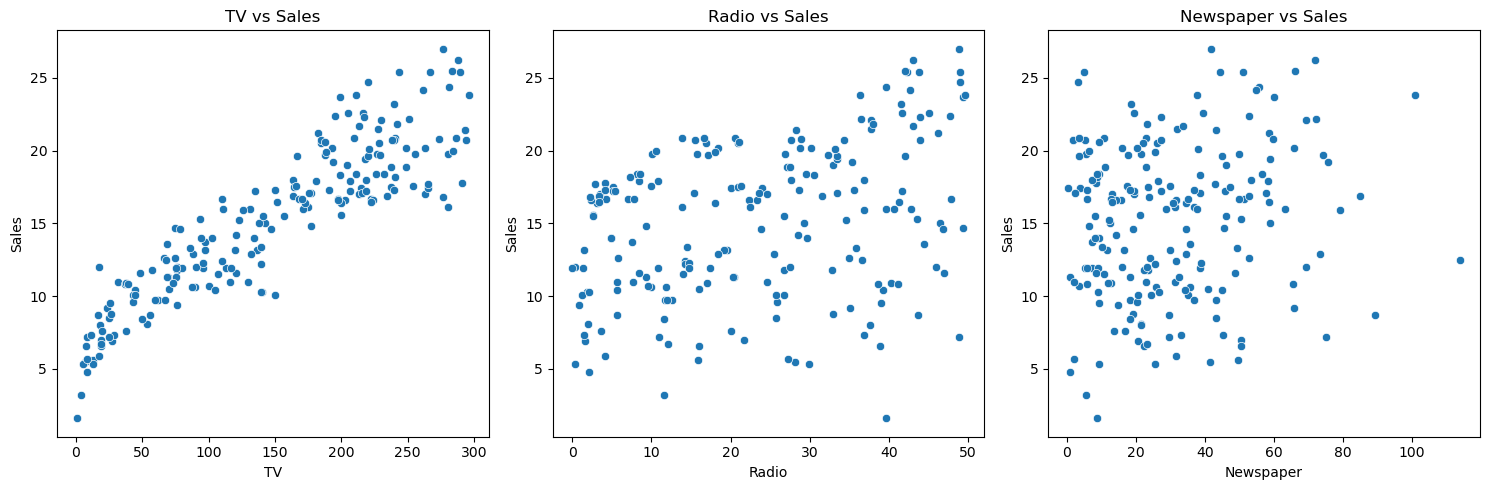

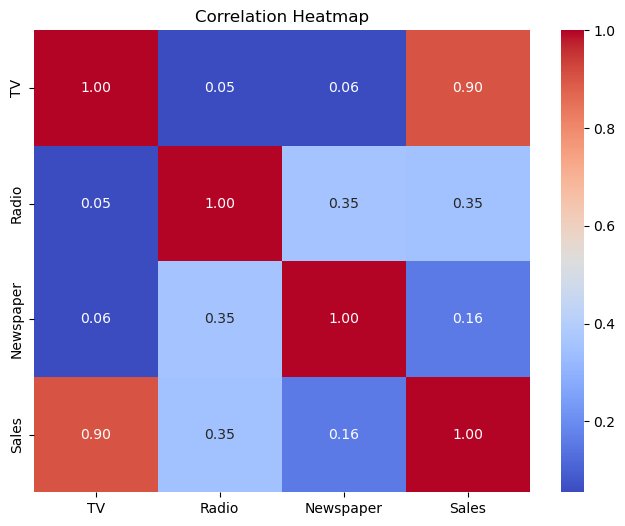

In [9]:

print("\nMissing Values:\n", advertising_data.isnull().sum())


print("\nDataset Summary:\n", advertising_data.describe())


features = ['TV', 'Radio', 'Newspaper']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=advertising_data, x=feature, y='Sales')
    plt.title(f'{feature} vs Sales')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(advertising_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [11]:
# Define features (X) and target (y)
X = advertising_data[['TV', 'Radio', 'Newspaper']]  # Independent variables
y = advertising_data['Sales']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and testing split completed.")



Training and testing split completed.


In [13]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("\nModels trained successfully.")



Models trained successfully.


In [15]:

with open('sales_prediction_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("\nModel saved as 'sales_prediction_model.pkl'")



Model saved as 'sales_prediction_model.pkl'


In [19]:

print(advertising_data.head())


print(advertising_data.head(10))


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
5    8.7   48.9       75.0    7.2
6   57.5   32.8       23.5   11.8
7  120.2   19.6       11.6   13.2
8    8.6    2.1        1.0    4.8
9  199.8    2.6       21.2   15.6


In [21]:

print(advertising_data.shape)


(200, 4)


In [23]:

print(advertising_data.dtypes)


TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


In [25]:

print(advertising_data.describe())


               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [27]:

print(advertising_data.isnull().sum())


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [29]:

print(advertising_data.columns)


Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [31]:

advertising_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [33]:

print(advertising_data['TV'])


print(advertising_data[['TV', 'Radio']])


0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64
        TV  Radio
0    230.1   37.8
1     44.5   39.3
2     17.2   45.9
3    151.5   41.3
4    180.8   10.8
..     ...    ...
195   38.2    3.7
196   94.2    4.9
197  177.0    9.3
198  283.6   42.0
199  232.1    8.6

[200 rows x 2 columns]


In [35]:

filtered_data = advertising_data[advertising_data['TV'] > 100]
print(filtered_data)


        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
7    120.2   19.6       11.6   13.2
9    199.8    2.6       21.2   15.6
..     ...    ...        ...    ...
193  166.8   42.0        3.6   19.6
194  149.7   35.6        6.0   17.3
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[130 rows x 4 columns]


In [37]:

print(advertising_data['TV'].value_counts())


TV
199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
        ..
139.3    1
216.8    1
199.1    1
26.8     1
232.1    1
Name: count, Length: 190, dtype: int64


In [39]:

sorted_data = advertising_data.sort_values(by='Sales', ascending=False)
print(sorted_data.head())


        TV  Radio  Newspaper  Sales
175  276.9   48.9       41.8   27.0
183  287.6   43.0       71.8   26.2
198  283.6   42.0       66.2   25.5
147  243.2   49.0       44.3   25.4
98   289.7   42.3       51.2   25.4


In [41]:

advertising_data.reset_index(drop=True, inplace=True)


Random Forest Model - RMSE: 1.20, R²: 0.95

Model saved as 'sales_prediction_model.joblib'


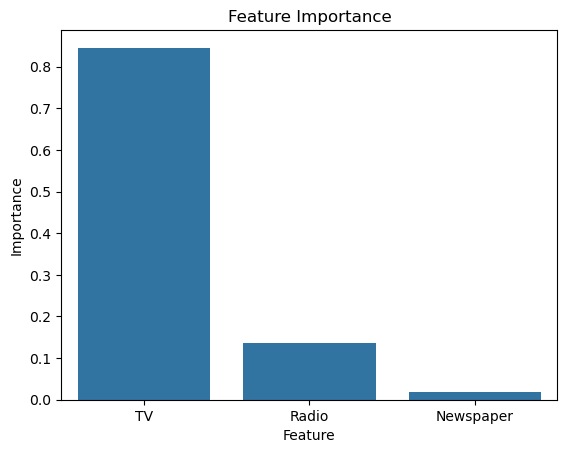

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

advertising_data = pd.read_csv('advertising.csv')

X = advertising_data[['TV', 'Radio', 'Newspaper']]
y = advertising_data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model - RMSE: {rmse:.2f}, R²: {r2:.2f}")

joblib.dump(rf_model, 'sales_prediction_model.joblib')
print("\nModel saved as 'sales_prediction_model.joblib'")

feature_importance = rf_model.feature_importances_
sns.barplot(x=X.columns, y=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


In [45]:
pip install Flask joblib matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


In [47]:
from flask import Flask, request, jsonify, render_template
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import base64

app = Flask(__name__)

model = joblib.load('sales_prediction_model.joblib')

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    tv = float(request.form['tv'])
    radio = float(request.form['radio'])
    newspaper = float(request.form['newspaper'])
    
    features = np.array([[tv, radio, newspaper]])
    
    prediction = model.predict(features)[0]
    
    feature_importance = model.feature_importances_
    fig, ax = plt.subplots()
    sns.barplot(x=['TV', 'Radio', 'Newspaper'], y=feature_importance, ax=ax)
    ax.set_title('Feature Importance')
    ax.set_xlabel('Feature')
    ax.set_ylabel('Importance')

    img = BytesIO()
    plt.savefig(img, format='png')
    img.seek(0)
    plot_url = base64.b64encode(img.getvalue()).decode('utf8')

    return render_template('result.html', prediction=prediction, plot_url=plot_url)

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\tripa\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [49]:
import joblib
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

advertising_data = pd.read_csv('advertising.csv')
X = advertising_data[['TV', 'Radio', 'Newspaper']]
y = advertising_data['Sales']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

joblib.dump(model, 'sales_prediction_model.joblib')


['sales_prediction_model.joblib']

In [51]:
pip install Flask joblib


Note: you may need to restart the kernel to use updated packages.


In [57]:
import joblib
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


advertising_data = pd.read_csv('advertising.csv')
X = advertising_data[['TV', 'Radio', 'Newspaper']]
y = advertising_data['Sales']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

joblib.dump(model, 'sales_model.joblib')


['sales_model.joblib']

In [59]:
import os
print(os.getcwd())


C:\Users\tripa
